<a href="https://colab.research.google.com/github/conglb/100-Days-Of-ML-Code/blob/master/Code/100dayofml_day4to6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary

**Logistic regression**

* What is logistic regression?
* What is outcome of logistic regression? between 0 and 1.
* When we use logistic regression?



Reading:
* Understanding Machine Learning (9.3)
* An Introduction to Statistical Learning

##Answer

### Step 1: Preprocessing

In [1]:
import numpy as np 
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv

dataset = pd.read_csv("Social_Network_Ads.csv")

--2021-06-25 01:05:57--  https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2021-06-25 01:05:57 (80.0 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Data investigation

In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
X[:, 1] = le.fit_transform(X[:, 1])

Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
X = sc.fit_transform(X)

In [14]:
X

array([[-0.93657932,  1.02020406, -1.78179743, -1.49004624],
       [ 1.66838653,  1.02020406, -0.25358736, -1.46068138],
       [-0.32087714, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.52039175, -0.98019606,  1.17910958, -1.46068138],
       [ 0.88695546,  1.02020406, -0.15807423, -1.07893824],
       [-1.36231017, -0.98019606,  1.08359645, -0.99084367]])

In [17]:
sc.mean_

array([1.56915398e+07, 4.90000000e-01, 3.76550000e+01, 6.97425000e+04])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 12)

####Step 2: Model

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Step 3: Prediction 

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

#### Step 4: Evaluating the predictions

Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [25]:
cm

array([[52,  9],
       [ 7, 32]])

Visual

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

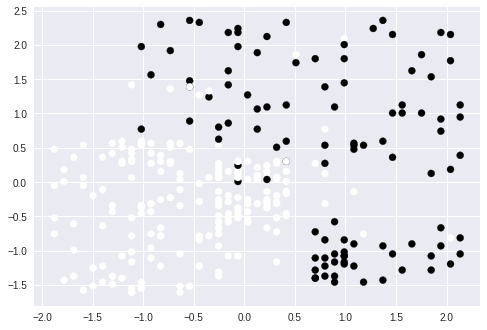

In [37]:
plt.scatter(X_train[:, 2], X_train[:, 3], c=Y_train)
#plt.plot(X_train[:, (2,3)], classifier.predict(X_train))

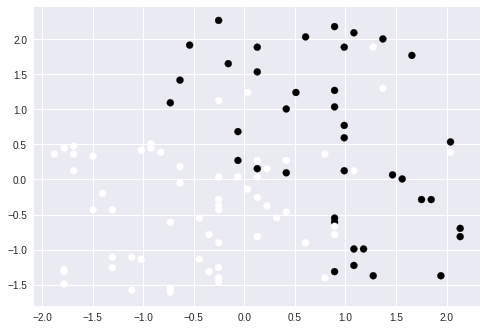

In [40]:
plt.scatter(X_test[:, 2], X_test[:, 3], c=Y_test)


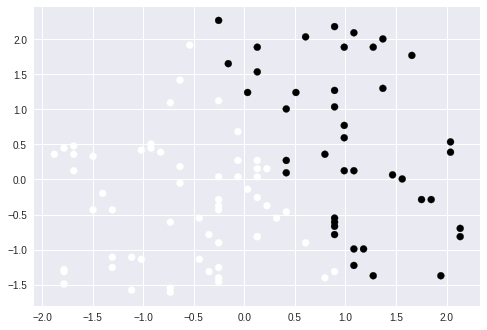

In [41]:
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_pred)


In [34]:
classifier.predict(X_train)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])